# **Assignment#3**
### **Lienar/Logistic Regression with Python**
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : seongwoo Cho

<br>

#### **INDEX** 

[**1. Linear Regression**](#1-linear-regression) 

&nbsp;&nbsp;&nbsp; 1-1. **[A1]** EDA <br>
&nbsp;&nbsp;&nbsp; 1-2. Data Processing <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[A2]** Cleaning missing values <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[A3]** Converting categorical variables to dummies <br>
&nbsp;&nbsp;&nbsp; 1-3. **[A4]** Model Building <br>
&nbsp;&nbsp;&nbsp; 1-4. **[A5]** Explanations on the model <br>
&nbsp;&nbsp;&nbsp; 1-5. **[A6]** Model Evaluation <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - MAE <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - MSE <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - RMSE <br>

[**2. Logistic Regression**](#2-logistic-regression)

&nbsp;&nbsp;&nbsp; 2-1. EDA <br>
&nbsp;&nbsp;&nbsp; 2-2. Data Processing <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[B1-1]** Dealing with missing values <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[B1-2]** Removing whitespace of col names <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[B3]** Generating dummies of the categorical variables <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[B4]** Creating DF only successful or failed <br>
&nbsp;&nbsp;&nbsp; 2-3. **[B5]** Model Building <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Splitting into train and test sets <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Building Logistic Regression model <br>
&nbsp;&nbsp;&nbsp; 2-4. Explanations on the model <br>
&nbsp;&nbsp;&nbsp; 2-5. **[B6]** Model Evaluation <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Confusion Matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - accuracy & precision <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - **[B7]** Suggestion for improving
<br>

---

<br>

## **1. Linear Regression**
The main purpose of this section is building a linear regression model for predicting 'DV:readingScore' by using the other variables.<br>
It includes EDA, Cleaning, Building Model, Explanations, and Model Evaluation.
<br><br>

### **Preparing**
    - pisa2009train
    - pisa2009test 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pisa_train = pd.read_csv('pisa2009train.csv')
pisa_test = pd.read_csv('pisa2009test.csv')


<br>

### **1-1. EDA**

***Data** : The Program for International Student Assessment (PISA) is a test given to 15-year-old students around the world to evaluate their performance in mathematics, reading, and science every three years. The test provides a quantitative way to compare the performance of students globally. You need to predict the reading scores of the U.S. students on the 2009 PISA exam.* <br><br>

The pisa data is already splitted into pisa2009train and pisa2009test for training model without any splitting process. <br><br>

#### **(1) Head observations**

##### **- train dataset**

In [10]:
pisa_train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


##### **- test dataset**

In [13]:
pisa_test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


<br>

#### **(2) Information of the dataset' structure**

##### **- train dataset**

In [15]:
pisa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

##### **- test dataset**

In [14]:
pisa_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

<br>

#### **(3) Baisc descriptive analysis on the dataset**

##### **- train dataset**

In [83]:
pisa_train.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


##### **- test dataset**

In [16]:
pisa_test.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,1570.000000,1570.000000,1549.000000,1547.000000,1525.000000,1382.000000,1534.000000,1445.000000,1282.000000,1457.000000,...,1543.000000,1540.000000,1549.000000,1467.000000,1456.000000,1512.000000,1570.000000,1570.000000,1501.000000,1570.000000
mean,10.094268,0.519108,0.710781,0.767292,0.868197,0.330680,0.719035,0.848443,0.325273,0.843514,...,0.865198,0.898052,0.282763,264.555556,24.701236,0.962302,0.934395,0.378981,1386.148568,496.846376
std,0.548507,0.499794,0.453546,0.422695,0.338388,0.470628,0.449617,0.358715,0.468660,0.363440,...,0.341623,0.302678,0.450488,152.413781,7.034184,0.190529,0.247669,0.485288,871.629257,95.820388
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,156.380000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,762.000000,430.470000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1273.000000,499.455000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,562.717500
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2025.000000,90.000000,1.000000,1.000000,1.000000,6694.000000,772.460000


<br>

#### **(4) Figuring out missing values**

##### **- train dataset**

In [84]:
pisa_train.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

##### **- test dataset**

<br>

#### **(5) BoxPlot : readingScore (Train Dataset)**

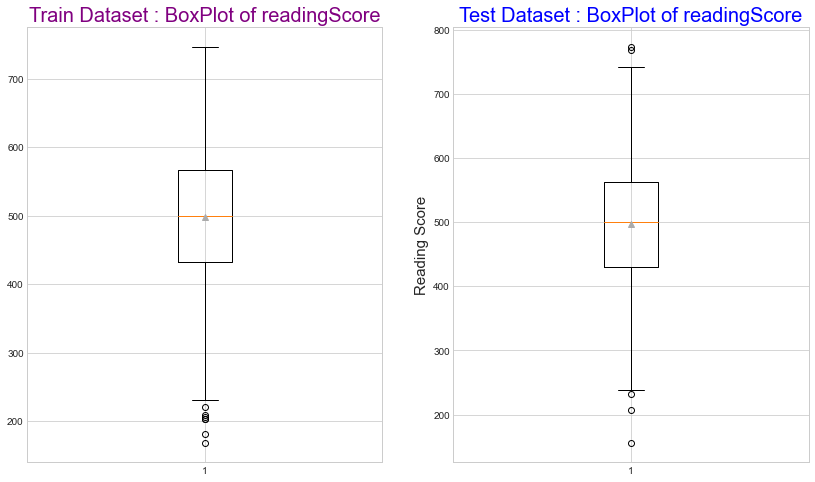

In [135]:
# Box plot 
# for reading score
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, 2)
plt.ylabel('Reading Score',fontsize=15)


fig.set_size_inches(14,8)

ax[0].boxplot(pisa_train['readingScore'],showmeans=True)
ax[0].set_title('Train Dataset : BoxPlot of readingScore',fontsize=20,color='purple')

ax[1].boxplot(pisa_test['readingScore'],showmeans=True)
ax[1].set_title('Test Dataset : BoxPlot of readingScore',fontsize=20,color='blue')

plt.show()

<br>

#### **(6) Bar chart : Counts by race**
It shows the majority of records by race is 'White'<br>
I'm gonna select 'white' as reference categories for creating race dummies.

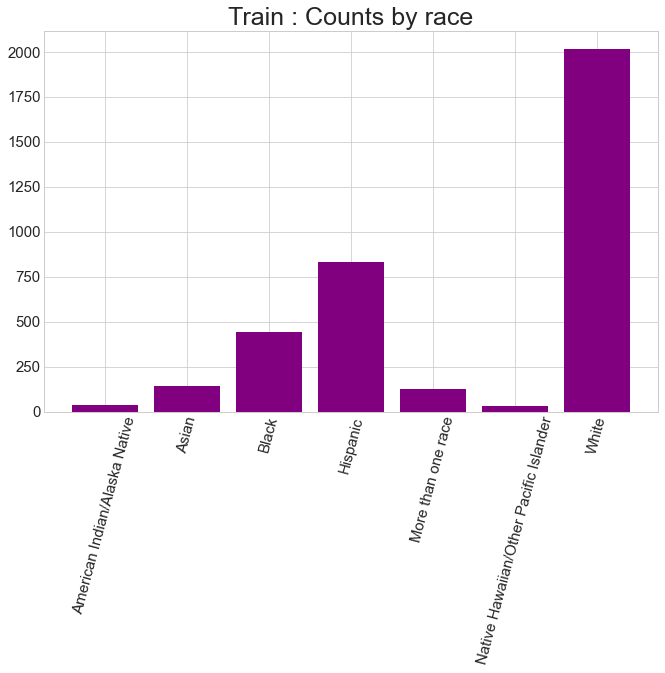

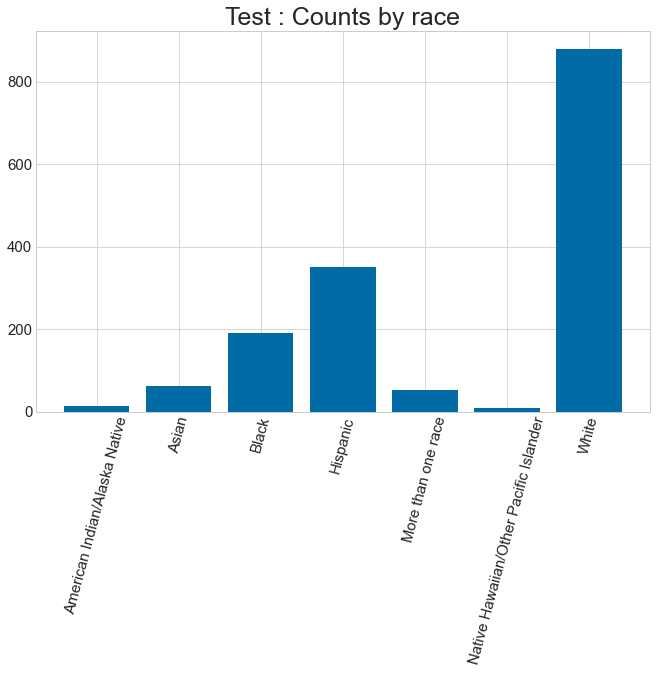

In [136]:
# bar chart
# showing race counts
pisa_race_tarin = pisa_train.groupby('raceeth')['raceeth'].count()

plt.figure(figsize=(11,7))
plt.title('Train : Counts by race',fontsize=25)
plt.xticks(rotation=75,fontsize=15)
plt.yticks(fontsize=15)
plt.bar(pisa_race_tarin.index, pisa_race_tarin.values, color='purple')
plt.show()

pisa_race_test = pisa_test.groupby('raceeth')['raceeth'].count()
plt.figure(figsize=(11,7))
plt.title('Test : Counts by race',fontsize=25)
plt.xticks(rotation=75,fontsize=15)
plt.yticks(fontsize=15)
plt.bar(pisa_race_test.index, pisa_race_test.values)
plt.show()

<br>

#### **(7) Bar chart : Average score by race**
The bar chart shows average reading score of asian is the highest one.

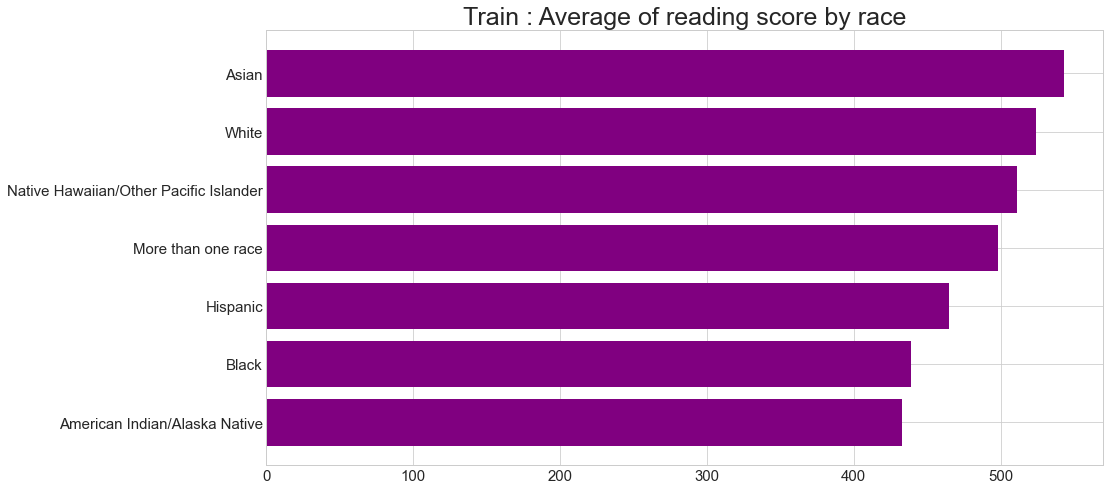

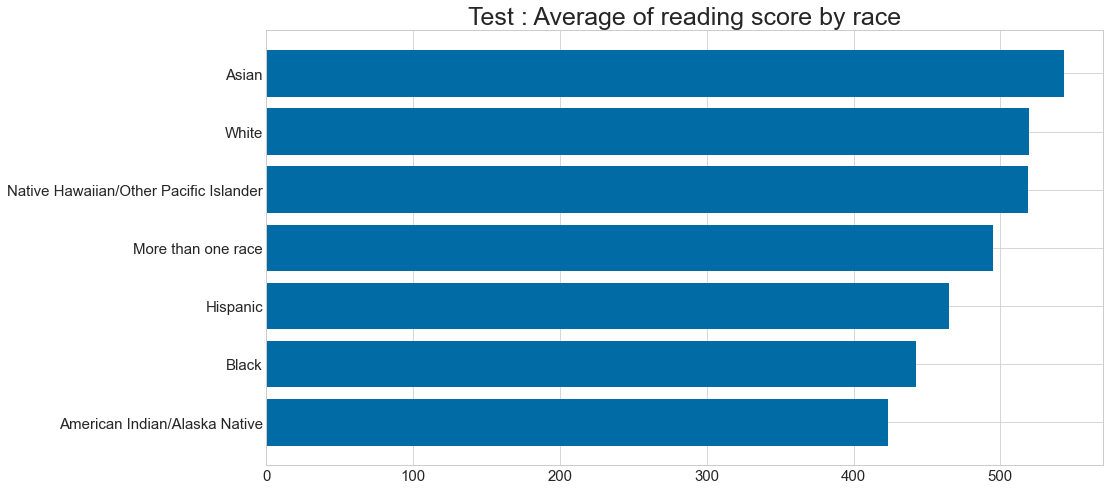

In [128]:
# barchart
# showing average score by race

pisa_avgScore_byRace_train = pisa_train.groupby('raceeth')['readingScore'].mean().sort_values(ascending=True)
pisa_avgScore_byRace_test = pisa_test.groupby('raceeth')['readingScore'].mean().sort_values(ascending=True)

plt.figure(figsize=(15,8))
plt.title('Train : Average of reading score by race',fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.barh(pisa_avgScore_byRace_train.index, pisa_avgScore_byRace_train.values ,color='purple')

plt.figure(figsize=(15,8))
plt.title('Test : Average of reading score by race',fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.barh(pisa_avgScore_byRace_test.index, pisa_avgScore_byRace_test.values)



plt.show()


<br>

#### **(8) Correlations & Pair Plot(Train)**

                          grade      male  preschool  expectBachelors  \
grade                  1.000000 -0.097677  -0.023262         0.140200   
male                  -0.097677  1.000000   0.014807        -0.078029   
preschool             -0.023262  0.014807   1.000000         0.076046   
expectBachelors        0.140200 -0.078029   0.076046         1.000000   
motherHS               0.005461  0.030586   0.141552         0.104886   
motherBachelors        0.043171  0.074250   0.151832         0.168330   
motherWork             0.019385 -0.011641   0.069249         0.069366   
fatherHS               0.046210  0.017784   0.117443         0.156028   
fatherBachelors        0.061713  0.076257   0.141418         0.199217   
fatherWork             0.012731  0.030614   0.065079         0.003122   
selfBornUS            -0.022154  0.022550   0.092893        -0.010330   
motherBornUS          -0.072814  0.015107   0.111684         0.012359   
fatherBornUS          -0.063530  0.008212   0.11220

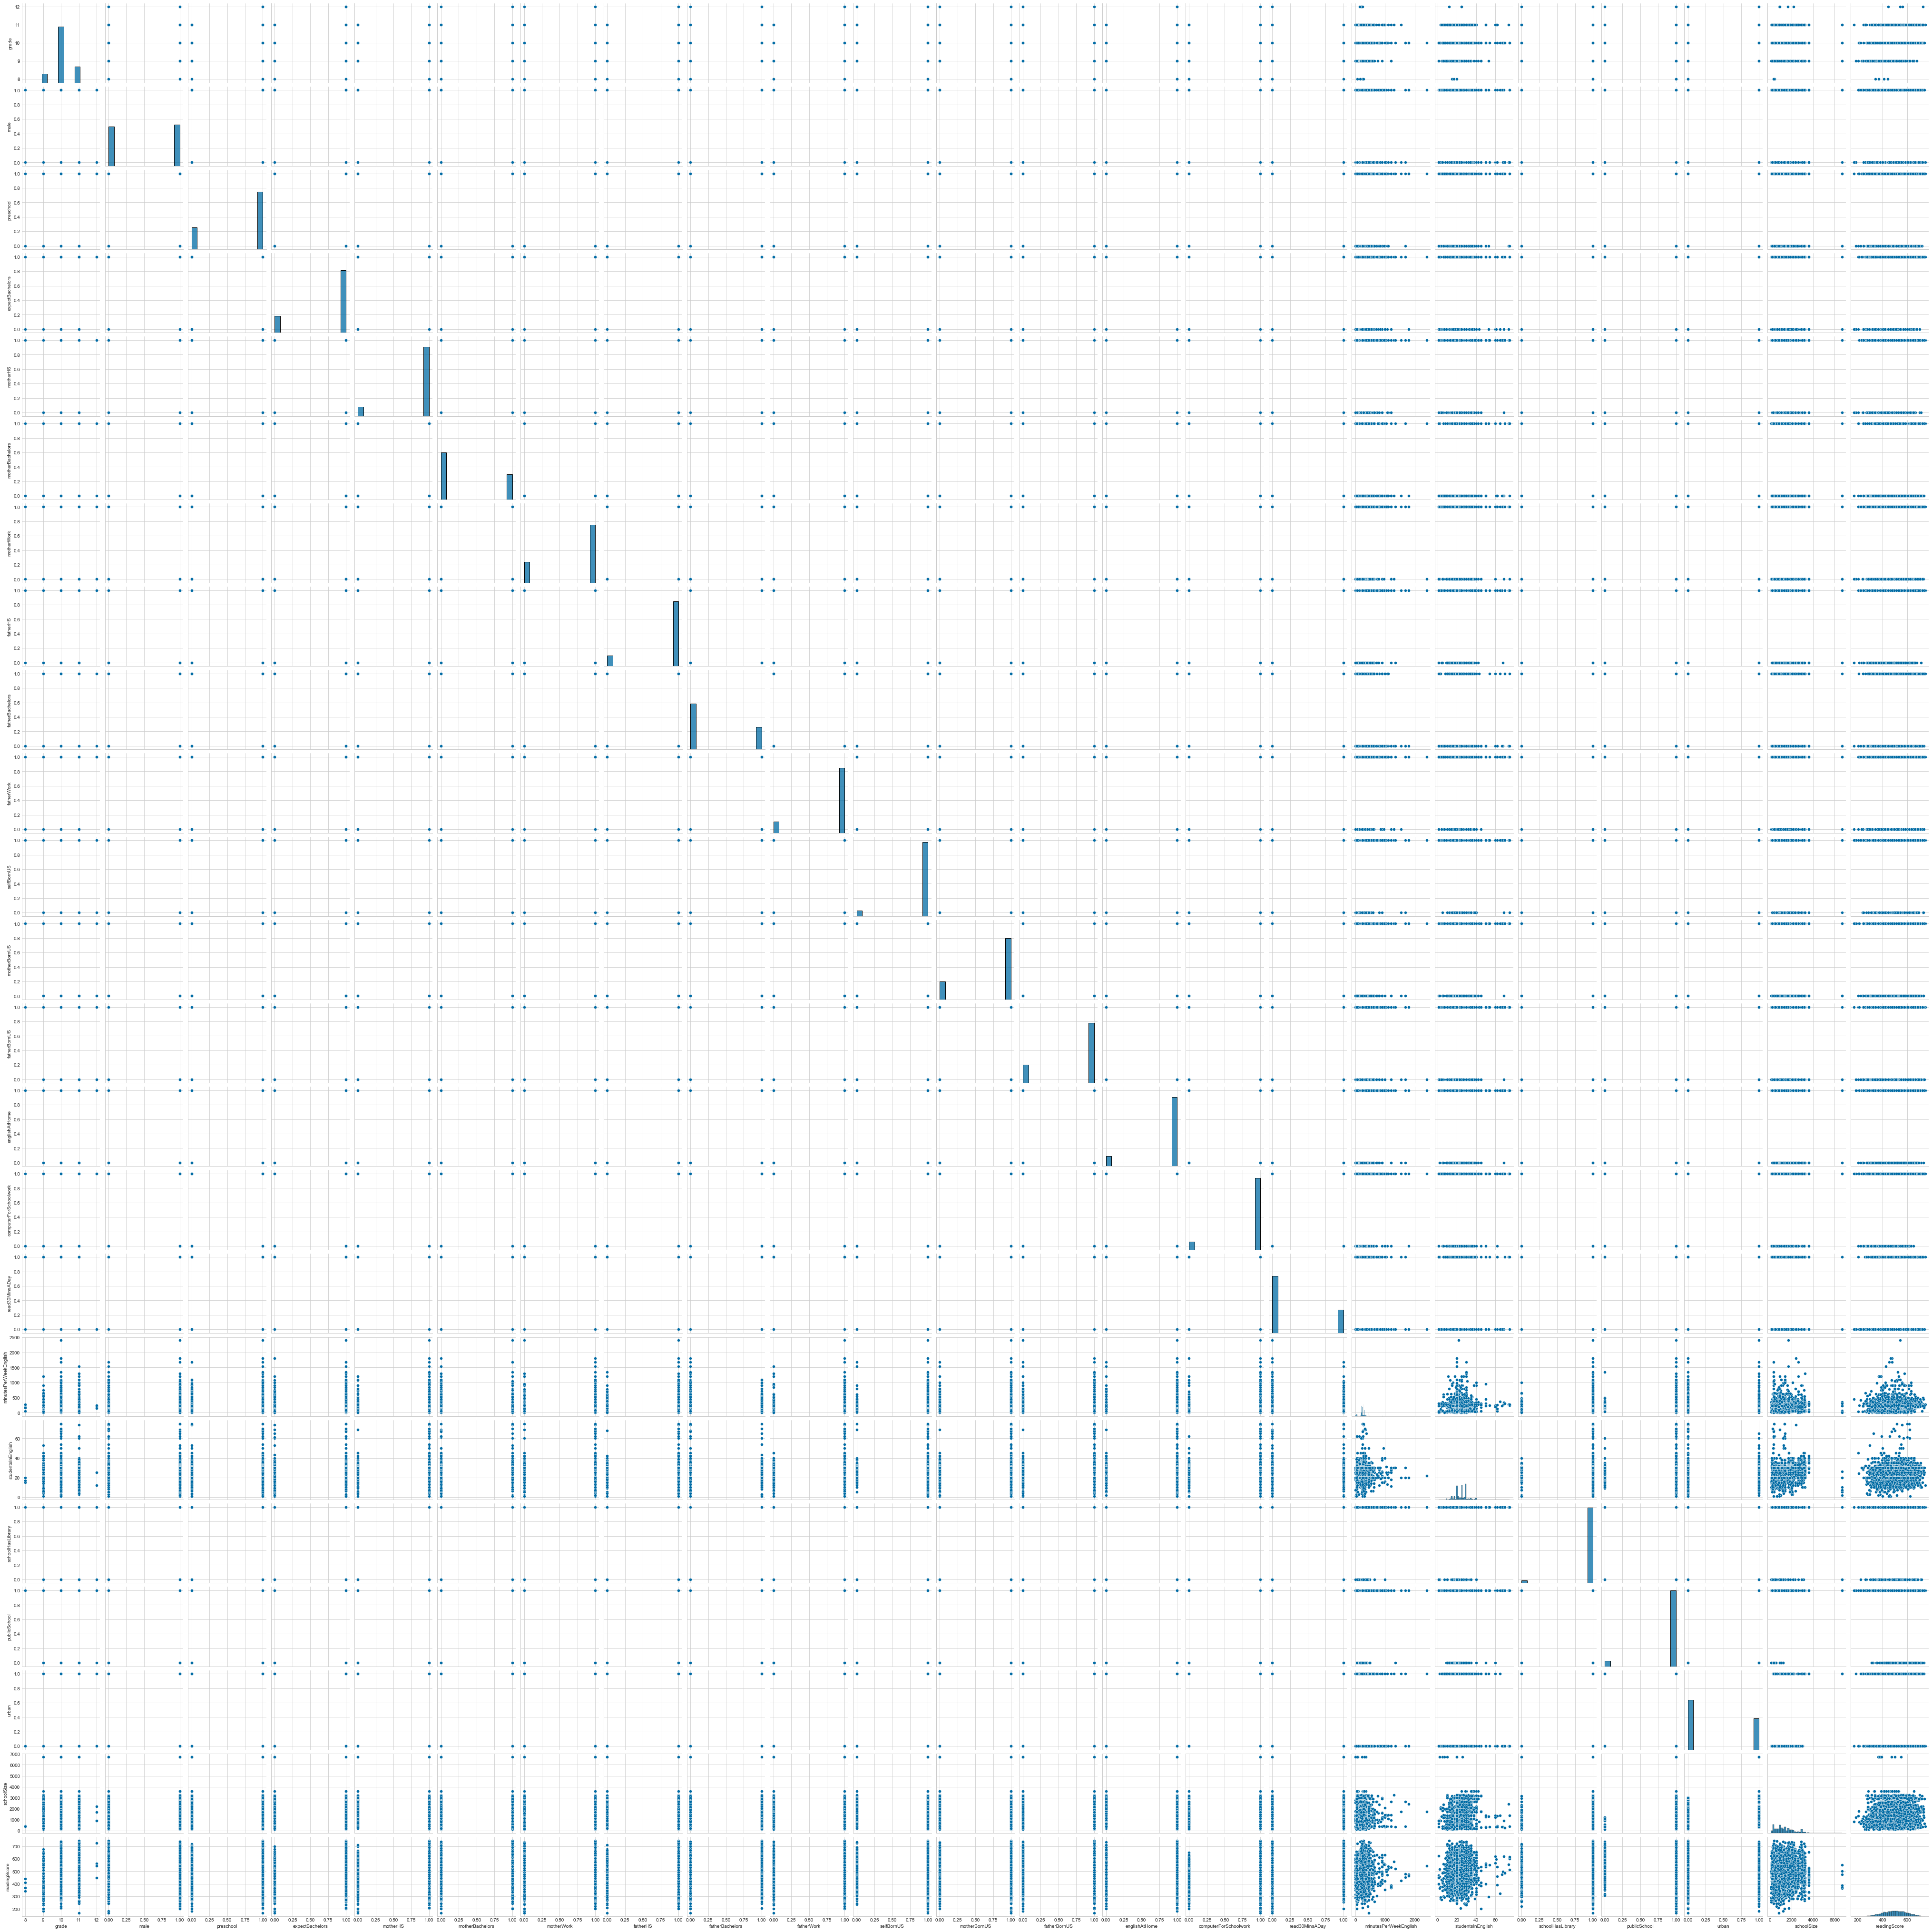

In [139]:
print(pd.DataFrame.corr(pisa_train))
sns.pairplot(pisa_train)

plt.title('PairPlot')
plt.show()

<br>

#### **(9) Plot showing distribution**
It is bell-shaped.

Text(0.5, 1.0, 'Test : Distribution Plot')

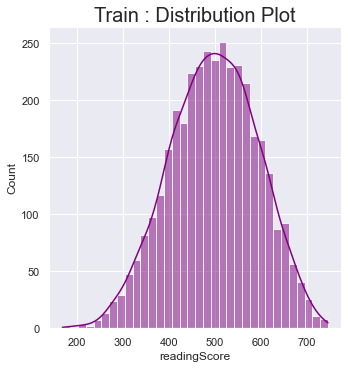

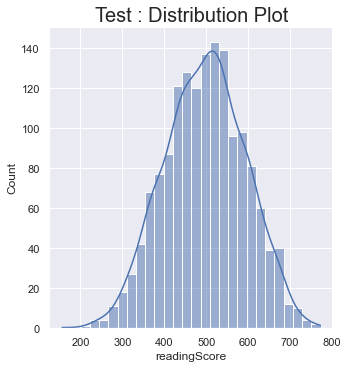

In [191]:
sns.displot(data=pisa_train, x='readingScore',kde=True,color='purple')
plt.title('Train : Distribution Plot', fontsize=20)

sns.displot(data=pisa_test, x='readingScore',kde=True)
plt.title('Test : Distribution Plot', fontsize=20)
# The option 'kde' means 'Kernal Density Estiamtion : It is a way to smoothing histogram which 
    # ref : https://darkpgmr.tistory.com/147

#### **Heat Map : Train**
It is bell-shaped.

<AxesSubplot:>

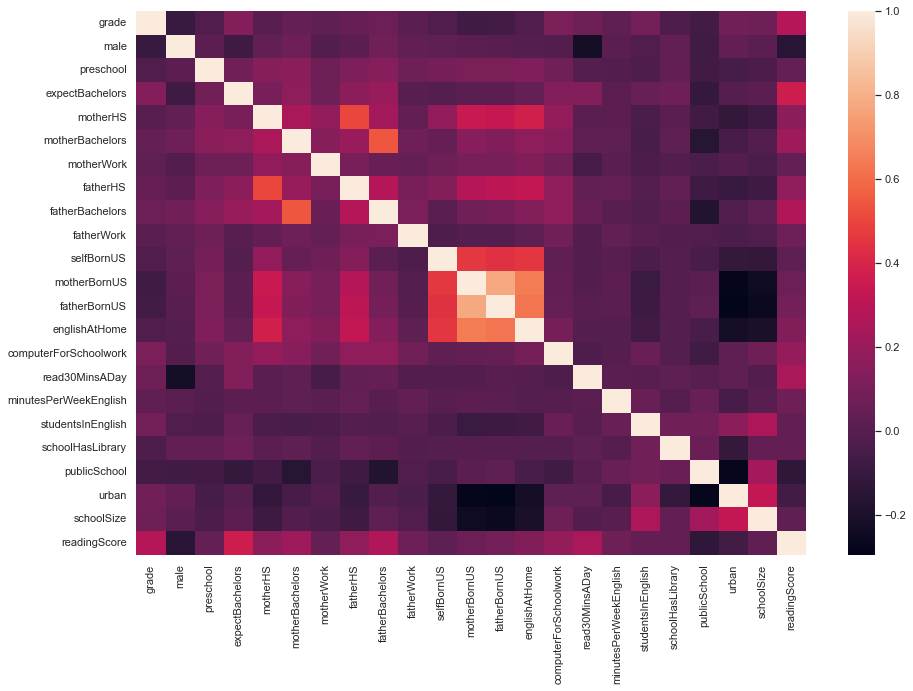

In [163]:

sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(pisa_train.corr())

<br>

### **1-2. Data Processing**

#### **(1) Cleaning missing values**
In (1-1), we figured out there are lots of missing values by using isnull() method.<br>
Thus, we should handle with these and I'm gonna do that by using dropna to remove missing values.

<br>

##### **- train dataset**

In [192]:
pisa_train_p = pisa_train.dropna(axis=0)  # axis=0 option order that remove records which has na values in any fields.

print(pisa_train.isnull().sum())

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64


<br>

##### **- test dataset**

In [193]:
pisa_test_p = pisa_test.dropna(axis=0)

print(pisa_test.isnull().sum())

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64


<br>

#### **(2) Converting categorical variables to dummies**
There is only one categorical field in our dataset.
Following the plan in (1-1-bar chart : counts by race), I selected 'White' as the reference categories.

##### **- train dataset**

In [194]:
pisa_train_pd = pd.get_dummies( data= pisa_train_p, drop_first=True, columns=['raceeth'])

pisa_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 1 to 3662
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   grade                                           2414 non-null   int64  
 1   male                                            2414 non-null   int64  
 2   preschool                                       2414 non-null   float64
 3   expectBachelors                                 2414 non-null   float64
 4   motherHS                                        2414 non-null   float64
 5   motherBachelors                                 2414 non-null   float64
 6   motherWork                                      2414 non-null   float64
 7   fatherHS                                        2414 non-null   float64
 8   fatherBachelors                                 2414 non-null   float64
 9   fatherWork                               

<br>

##### **- test dataset**

In [196]:
pisa_test_pd = pd.get_dummies( data= pisa_test_p, drop_first=True, columns=['raceeth'])

pisa_test_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 1569
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   grade                                           990 non-null    int64  
 1   male                                            990 non-null    int64  
 2   preschool                                       990 non-null    float64
 3   expectBachelors                                 990 non-null    float64
 4   motherHS                                        990 non-null    float64
 5   motherBachelors                                 990 non-null    float64
 6   motherWork                                      990 non-null    float64
 7   fatherHS                                        990 non-null    float64
 8   fatherBachelors                                 990 non-null    float64
 9   fatherWork                                

<br>

### **1-3. Model Building**

#### **(1) Splitting into DV / IDV**
'pisa_train_p' should be splitted into DV / IDV sets

In [198]:
pisaDV_train = pisa_train_pd['readingScore'] #y
pisaIDV_train = pisa_train_pd[pisa_train_pd.columns.difference( ['readingScore'] )] #X

pisaDV_test = pisa_test_pd['readingScore'] #y
pisaIDV_test = pisa_test_pd[pisa_test_pd.columns.difference( ['readingScore'] )] #X


print(len(pisaIDV_train))
print(len(pisaIDV_test))
print(len(pisaDV_train))
print(len(pisaDV_test))


2414
990
2414
990


<br>

#### **(2) Building a Linear Regression Model**
Creating and Traing, and then showing coefficient values to DV of the indipendent variables

In [205]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # creating
lm.fit(pisaIDV_train,pisaDV_train) # training

# show coeffs
df_coeff_pisa = pd.DataFrame(lm.coef_, pisaIDV_train.columns, columns= ['Coefficient'])
print(df_coeff_pisa.sort_values('Coefficient',ascending=False))


                                                Coefficient
raceeth_White                                     67.277327
raceeth_Asian                                     63.167002
raceeth_Native Hawaiian/Other Pacific Islander    62.175726
expectBachelors                                   55.267080
raceeth_More than one race                        50.354805
read30MinsADay                                    34.871924
grade                                             29.542707
raceeth_Hispanic                                  28.301842
computerForSchoolwork                             22.500232
fatherBachelors                                   16.929755
motherBachelors                                   12.638068
schoolHasLibrary                                  12.215085
englishAtHome                                      8.035685
motherHS                                           6.058774
fatherWork                                         5.842798
fatherBornUS                            

<br>

#### **(3) Predictions from the Model**

In [209]:
predictions = lm.predict(pisaDV_test)

C:\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[355.24 453.5  405.13 665.05 604.84 626.08 525.32 354.63 547.35 571.39
 513.84 380.34 467.1  482.5  545.73 516.1  412.67 567.74 716.37 669.61
 462.88 473.28 595.62 409.02 550.58 606.43 428.7  561.62 623.67 475.92
 541.76 336.65 694.46 534.04 545.5  514.56 498.31 514.64 414.51 356.23
 510.78 516.26 555.45 624.94 456.36 662.27 626.92 547.64 639.   450.09
 413.07 593.16 510.78 526.91 521.78 589.52 552.17 691.67 527.15 433.72
 490.67 486.07 344.13 460.13 378.04 669.34 573.17 412.91 610.8  538.13
 514.59 417.64 459.94 613.02 551.14 537.89 604.67 510.14 480.97 458.03
 497.43 465.34 462.21 499.66 503.66 554.01 548.31 551.29 541.02 412.59
 406.5  500.53 399.72 576.37 440.73 535.57 417.28 508.95 639.39 432.93
 677.13 592.84 605.15 685.79 592.84 620.71 539.34 461.61 482.82 545.03
 574.05 522.1  664.66 661.16 482.82 598.58 546.53 399.52 437.36 399.41
 473.92 466.7  688.17 624.79 467.09 602.14 626.4  559.16 631.37 561.78
 687.3  505.22 551.53 617.42 558.17 589.98 670.17 576.85 594.11 673.08
 582.14 587.36 586.47 428.78 599.2  504.78 485.62 505.06 670.41 527.7
 674.82 616.46 389.42 497.57 363.29 652.82 545.43 533.82 463.59 443.26
 512.21 486.34 588.64 615.64 561.38 442.38 547.64 496.   534.12 593.85
 561.62 459.06 439.85 437.92 527.23 592.13 530.36 357.6  438.48 518.41
 504.19 391.27 520.42 422.93 588.08 413.31 540.3  523.7  633.2  482.26
 690.45 590.06 625.02 496.   444.9  622.95 635.7  504.86 624.62 423.4
 517.69 370.98 573.73 569.4  562.34 505.78 573.54 602.37 558.09 438.24
 441.43 462.62 471.19 444.05 529.61 378.28 505.75 679.27 568.69 603.79
 533.08 483.7  508.07 429.04 449.23 406.42 497.81 432.93 435.23 646.31
 370.25 366.04 427.21 352.95 378.04 525.32 707.08 606.66 574.93 524.1
 484.02 456.44 647.96 467.02 631.53 546.77 530.48 597.78 500.94 589.68
 560.58 424.22 529.07 569.4  509.11 740.44 649.24 353.33 551.06 485.22
 645.51 657.5  442.33 727.57 606.19 544.95 450.25 506.87 562.82 545.59
 517.29 709.06 440.87 550.08 499.58 377.48 517.53 568.2  493.64 512.24
 562.97 482.9  682.11 675.3  545.18 557.69 345.65 515.31 514.51 400.57
 526.67 598.01 565.44 467.26 581.8  636.22 476.16 708.11 551.28 540.81
 644.27 575.01 715.1  494.44 579.73 499.02 473.21 479.37 595.61 544.62
 581.74 473.76 535.81 452.83 585.67 530.52 518.65 579.73 477.05 516.98
 524.05 490.76 584.66 525.15 451.99 370.41 545.75 314.33 586.15 330.1
 438.57 554.81 454.14 431.11 416.25 469.47 665.12 506.65 511.1  479.53
 385.9  444.58 490.68 622.16 580.38 517.69 366.2  584.63 561.46 495.16
 444.18 597.85 522.9  527.71 430.47 415.45 462.7  458.83 625.52 474.56
 511.76 451.31 383.41 474.48 491.48 574.33 489.09 314.95 475.83 627.36
 534.61 614.21 425.66 607.22 541.18 535.88 441.67 595.45 360.16 419.27
 537.63 397.74 675.94 595.61 581.74 637.62 615.49 602.59 510.39 678.43
 474.4  515.37 352.14 597.13 507.6  541.84 498.63 602.67 415.48 462.08
 583.31 399.84 387.41 672.33 416.33 609.92 448.5  554.73 490.59 501.34
 564.35 477.21 526.43 598.64 588.24 634.81 697.15 433.92 413.39 542.79
 488.78 496.56 427.92 480.81 424.51 471.14 472.41 506.57 463.9  499.41
 298.91 496.45 565.67 537.63 566.11 560.34 379.55 533.02 542.14 522.54
 393.92 537.   496.21 377.64 555.9  497.09 445.64 477.42 454.36 506.25
 408.86 423.95 523.78 546.61 593.69 524.58 454.14 429.03 528.43 489.09
 574.53 327.29 608.2  467.09 435.12 531.56 342.85 303.24 549.79 621.03
 482.82 465.5  392.23 532.07 359.69 509.83 560.9  507.19 454.6  682.03
 543.35 551.61 398.72 555.21 594.25 603.65 673.79 534.77 638.6  523.33
 625.81 544.31 540.06 554.41 658.7  454.2  486.79 470.79 480.17 414.5
 511.42 601.98 652.53 581.98 636.53 581.42 475.59 415.72 605.55 511.73
 419.32 434.4  251.21 405.76 448.19 445.88 339.35 450.25 512.61 372.79
 351.66 476.38 559.38 565.87 518.41 517.14 675.3  500.45 553.12 547.27
 487.15 611.35 538.43 490.76 377.88 646.78 457.79 506.15 347.74 529.96
 515.07 494.36 462.16 585.11 500.93 483.46 594.57 677.62 514.8  668.55
 505.67 611.89 509.67 462.78 355.71 423.25 590.46 530.4  572.66 524.26
 482.9  666.48 609.05 534.06 562.65 317.59 448.75 622.55 535.41 491.07
 581.16 662.83 736.23 376.44 707.79 640.03 413.55 581.48 560.98 505.14
 632.01 380.34 600.26 530.44 611.59 589.19 645.48 644.24 541.18 514.4
 420.69 564.96 511.57 554.79 500.69 499.42 534.12 519.93 590.46 528.99
 611.81 476.46 772.46 598.9  647.74 582.63 575.73 648.6  526.51 460.42
 641.15 646.07 550.26 655.74 619.53 497.28 460.21 443.26 566.19 622.23
 545.73 626.21 726.3  594.19 598.8  678.91 625.89 651.17 648.2  460.1
 612.61 504.46 699.93 547.08 657.59 624.71 568.12 517.22 419.81 398.29
 454.06 619.42 489.89 453.72 622.23 462.64 672.81 584.71 589.19 542.56
 466.37 610.32 528.89 452.75 554.57 493.78 480.41 505.91 677.76 641.95
 556.38 461.57 599.67 353.83 458.29 611.89 400.16 593.69 383.91 334.51
 488.38 342.04 342.2  563.45 540.81 552.24 494.65 578.54 622.47 403.05
 528.51 597.37 501.88 507.76 518.17 443.38 488.19 309.18 528.51 457.
 531.16 448.75 640.59 551.44 607.54 574.49 561.86 490.83 605.55 670.41
 572.58 635.34 576.72 641.62 574.09 595.85 461.17 508.64 452.83 515.86
 576.48 611.89 475.12 507.36 721.77 700.56 662.71 560.82 504.14 660.39
 614.61 507.19 539.01 537.73 688.05 577.17 494.28 533.72 587.92 562.74
 559.78 441.69 497.28 493.64 500.61 434.04 532.79 380.6  468.39 636.82
 360.64 485.22 561.62 542.72 634.23 351.42 459.94 382.88 419.24 538.11
 518.88 546.15 464.22 600.23 332.5  461.25 293.54 481.94 459.65 485.92
 417.04 335.22 589.92 582.28 510.64 492.43 438.16 576.69 410.27 555.53
 471.14 457.32 541.68 500.45 595.93 523.73 525.31 526.75 524.92 496.13
 675.86 465.26 459.57 654.88 471.22 328.86 490.13 613.34 532.86 590.3
 348.88 622.55 525.79 553.77 450.67 649.32 539.34 474.72 648.05 558.5
 598.74 527.3  415.13 555.51 405.14 630.1  490.13 517.29 471.85 742.32
 511.44 446.74 625.73 640.03 508.4  468.31 425.86 411.07 461.85 454.62
 468.12 559.08 501.8  589.92 629.76 534.12 504.54 501.96 486.71 386.54
 561.7  543.03 582.47 572.98 541.82 461.53 397.04 546.95 356.95 440.08
 496.64 435.92 544.94 467.8  546.05 571.63 525.4  522.46 392.79 608.25
 628.51 372.27 768.01 495.24 518.49 510.86 367.07 450.27 379.48 380.6
 319.09 374.99 476.14 543.5  670.61 622.31 473.28 735.91 559.   465.58
 611.91 446.35 539.38 595.62 487.63 475.2  464.86 378.68 483.94 415.48
 486.59 655.1  467.59 367.79 535.17 529.85 420.21 471.78 393.35 509.27
 615.96 544.15 367.7  420.14 596.81 357.3  438.57 635.7  481.61 438.48
 544.38 440.95 371.79 600.47 415.8  672.36 441.59 438.48 519.28 540.49
 334.51 491.16 448.74 493.07 569.8  453.8  542.   432.55 530.08 485.68
 608.12 511.44 635.78 536.2  500.69 569.48 440.89 622.31 399.84 533.1
 708.67 476.97 422.21 435.36 372.67 475.44 594.25 580.94 515.55 502.84
 532.94 505.3  531.24 439.45 462.29 306.05 572.74 541.02 475.91 484.02
 393.51 488.78 568.6  423.63 435.15 446.2  389.82 364.37 430.47 377.96
 472.97 487.9  566.19 451.47 619.85 483.53 528.02 435.76 525.4  583.35
 421.81 496.   614.93 533.72 242.64 593.05 371.44 617.79 426.73 638.12
 414.74 562.18 526.67 582.55 611.91 667.2  541.76 465.58 596.34 577.43].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### **1-4. Explanations on the model : Key Explainers**

In [203]:
print('(1) Holding all other features, whether an observation belongs to specific race group or not has a significant affection to \'reading score(DV)\' -> Especially, Pacific Icelander, Asian, White, Hispanic, and \'More than race\' are strong positive Explainers.')

print('(2) \'Read 30 minutes a day\' is also a main explainer about 34.87.. .')

print('(3) \'FatherBachelors\' & \'MotherBachelors\',\'fatherBornUs\' show impressive effections, we can put the fact from these that parents are important explainer for a student\'s reading score.')
print('(4) \'school Has Library\', \'self Born US\', \'computer For schoolwork\' are also have considerable effection, it means environments surrounding a student are important facotrs for readingScore.')
print('(5) On the other side, \'(is) public school\' has negative effect. It alludes that there is a huge environmental gap in an education between private schools and public schools.')

print('(6)\'(is) male\' also has negative effects. Gender is a also considerable factor in a predicting')


(1) Holding all other features, whether an observation belongs to specific race group or not has a significant affection to 'reading score(DV)' -> Especially, Pacific Icelander, Asian, White, Hispanic, and 'More than race' are strong positive Explainers.
(2) 'Read 30 minutes a day' is also a main explainer about 34.87.. .
(3) 'FatherBachelors' & 'MotherBachelors','fatherBornUs' show impressive effections, we can put the fact from these that parents are important explainer for a student's reading score.
(4) 'school Has Library', 'self Born US', 'computer For schoolwork' are also have considerable effection, it means environments surrounding a student are important facotrs for readingScore.
(5) On the other side, '(is) public school' has negative effect. It alludes that there is a huge environmental gap in an education between private schools and public schools.
(6)'(is) male' also has negative effects. Gender is a also considerable factor in a predicting


Coefficients in (section 1-3) show follwing implications.

* Holding all other features, whether an observation belongs to specific race group or not has a significant affection to 'reading score(DV)' <br><br>
*-> Especially, Pacific Icelander, Asian, White, Hispanic, and 'More than race' are strong positive Explainers.*    <br><br>

* 'Read 30 minutes a day' is main explainer about 34.78.. .
* 'FatherBachelors' & 'MotherBachelors','fatherBornUs' show impressive effections, we can put the fact from these that parents are important explainer for a student's reading score.
* 'school Has Library', 'self Born US', 'computer For schoolwork' are also have considerable effection, it means environments surrounding a student are important facotrs for readingScore.
* On the other side, '(is) public school ' has negative effect'


<br>

### **1-5. Model Evaluation indices MAE, MSE, RMSE**

<br>

<br>

---

<br>

## **2. Logistic Regression**
The main purpose of this section is building a Logistic regression model<br>
for predicting which crowdfunding projects are successfully founded or not.
<br><br>
It includes EDA, Cleaning, Building Model, Explanations, and Model Evaluation.
<br><br><br>

### Preparing

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_ks = pd.read_csv('./ks_projects_201612.csv',encoding='latin_1')
df_ks.head()

C:\Users\he125\AppData\Local\Temp\ipykernel_4876\3515552774.py:7: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ks = pd.read_csv('./ks_projects_201612.csv',encoding='latin_1')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<br>

### 2-1. EDA & Pre-processing

**Data** : ks-projects-201612 is the data representing '2016 kickstarter Projects'. <br>
It has columns including Id, name, category, main category ...etc.

<br>

#### **(1) Head observations**

In [47]:
df_ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<br>

#### **(2) Information**
Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16 are useless and need to be removed. <br>
Also, most of variables represented in object type should be converted to proper data types like numeric or categorical.

In [48]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

#### **(2+) Processing : Drop useless columns**

In [49]:
df_ks.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1, inplace=True)
df_ks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              323750 non-null  int64 
 1   name            323746 non-null  object
 2   category        323745 non-null  object
 3   main_category   323750 non-null  object
 4   currency        323750 non-null  object
 5   deadline        323750 non-null  object
 6   goal            323750 non-null  object
 7   launched        323750 non-null  object
 8   pledged         323750 non-null  object
 9   state           323750 non-null  object
 10  backers         323750 non-null  object
 11  country         323750 non-null  object
 12  usd pledged     319960 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


#### **(2++) Processing : Convert data types**

In [50]:
df_ks[['goal ','pledged ','backers ','usd pledged ']] = df_ks[['goal ','pledged ','backers ','usd pledged ']].apply(pd.to_numeric,errors='coerce')

df_ks[['goal ','pledged ','backers ','usd pledged ']]

,goal,pledged,backers,usd pledged
0,1000.0,0.0,0.0,0.0
1,45000.0,220.0,3.0,220.0
2,5000.0,1.0,1.0,1.0
3,19500.0,1283.0,14.0,1283.0
4,50000.0,52375.0,224.0,52375.0
...,...,...,...,...
323745,50000.0,25.0,1.0,25.0
323746,1500.0,155.0,5.0,155.0
323747,15000.0,20.0,1.0,20.0
323748,15000.0,200.0,6.0,200.0


<br>

#### **(3) Checking missing values**

In [51]:
df_ks.isnull().sum()

ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal               632
launched             0
pledged            624
state                0
backers            623
country              0
usd pledged       4413
dtype: int64

#### **(3+) Processing : Drop missing values**

In [52]:
df_ks = df_ks.dropna()
df_ks.isnull().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

<br>

#### **(4) Checking column names**
Id, name, .., usd pledged, all columns have a whitespace, which might bring about some errors.

In [53]:
print(df_ks.columns.values)

['ID ' 'name ' 'category ' 'main_category ' 'currency ' 'deadline '
 'goal ' 'launched ' 'pledged ' 'state ' 'backers ' 'country '
 'usd pledged ']


#### **(4+) Processing : Remove whiteSpaces in colnames**

In [54]:
newColnames = []
for i in range(len(df_ks.columns.values)) :
    newColnames.append(df_ks.columns.values[i][:len(df_ks.columns.values[i])-1])

df_ks.columns = newColnames
df_ks.head()
print(df_ks.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')


<br>

#### **(5) Bar chart : Currecy counts**
USD is a major currency in the kickstarter projects.

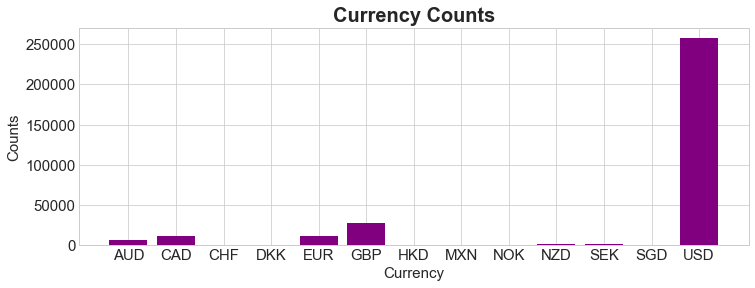

In [55]:
ks_cnt_cur= df_ks.groupby('currency')['currency'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,4))

plt.bar(ks_cnt_cur.index.values,ks_cnt_cur.values,color='purple')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Currency Counts',fontsize=20,fontweight='bold')
plt.xlabel('Currency',fontsize=15)
plt.ylabel('Counts',fontsize=15)

plt.show()

<br>

#### **(6) Bar chart : Country counts**
US is the major country in the kickstarter projects.

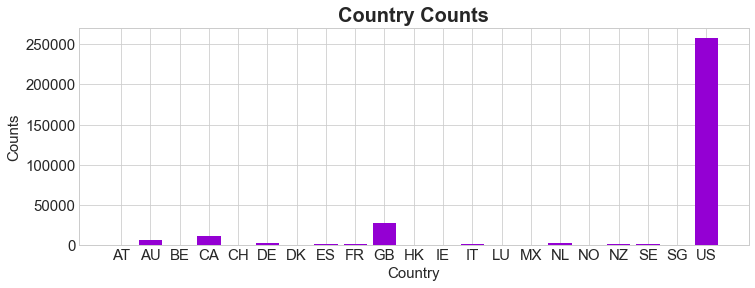

In [56]:
ks_cnt_country= df_ks.groupby('country')['country'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,4))

plt.bar(ks_cnt_country.index.values,ks_cnt_country.values,color='darkviolet')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country Counts',fontsize=20,fontweight='bold')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Counts',fontsize=15)

plt.show()

#### **(7) Pie chart : States**
Most projects were failed.

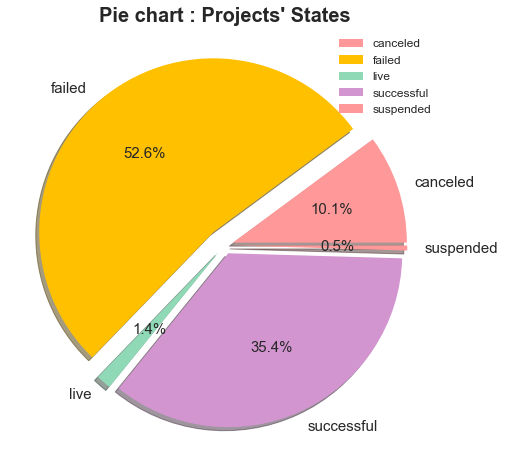

In [57]:
ks_cnt_st= df_ks.groupby('state')['state'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode= [0.05,0.1,0.05,0.05,0.05]

plt.pie(ks_cnt_st.values,labels=ks_cnt_st.index.values, 
        autopct='%.1f%%', 
        explode=explode, 
        shadow=True,
        colors=colors,
        textprops={'fontsize':15})
plt.title('Pie chart : Projects\' States',fontsize=20,fontweight='bold')
plt.legend(loc='upper right', fontsize=12)


plt.show()

<br>

#### **(8) Counted Bar Chart having splited legends by main categories**
Film & video , Music have the most frequencies not only in successful but also failed.

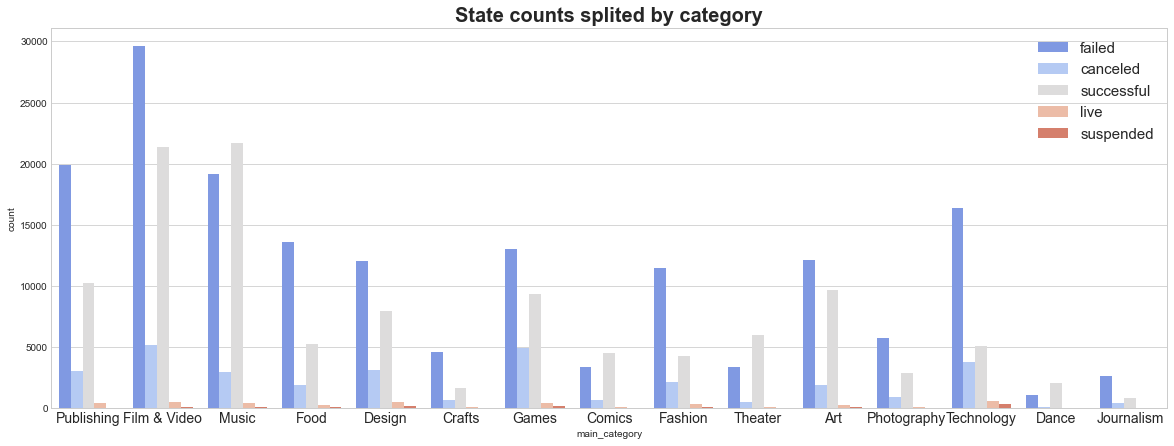

In [58]:
plt.figure(figsize=(20,7))

palette1 = sns.color_palette('coolwarm',5)
sns.countplot(data=df_ks,x='main_category', hue='state',palette=palette1)

plt.title('State counts splited by category',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14)
plt.legend(loc='upper right',fontsize=15)

<br>

### 2-2. Generating dummies 

#### (1) Drop all the projects unfinished 
I'll drop the three state values live, suspended, canceled for predicting successful cases.

In [117]:
df_ks_p = df_ks
df_ks_p.drop(df_ks_p.loc[df_ks_p['state'] == 'live'].index, inplace=True)
df_ks_p.drop(df_ks_p.loc[df_ks_p['state'] == 'suspended'].index, inplace=True)
df_ks_p.drop(df_ks_p.loc[df_ks_p['state'] == 'canceled'].index, inplace=True)

print(df_ks_p['state'].value_counts())

failed        168113
successful    112976
Name: state, dtype: int64


<br>

#### (2) Generate dummies

In [187]:
df_ks_pd = pd.get_dummies(data=df_ks_p, columns=['main_category','country','currency'],drop_first=True)
# df_ks_pd = pd.get_dummies(data=df_ks_p, columns=['country','currency'],drop_first=True)
df_ks_pd.head()

,ID,name,category,deadline,goal,launched,pledged,state,backers,usd pledged,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000002330,The Songs of Adelaide & Abullah,Poetry,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1000004038,Where is Hank?,Narrative Film,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,220.0,...,0,0,0,0,0,0,0,0,0,1
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,1000014025,Monarch Espresso Bar,Restaurants,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,52375.0,...,0,0,0,0,0,0,0,0,0,1
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16.0,1205.0,...,0,0,0,0,0,0,0,0,0,1


<br>

#### **(3) Convert the Dependent Variable's values to [0,1]**

'state''s values should be replaced to [0,1] for building a Logistic Regression model.

In [203]:
df_ks_pd.loc[df_ks_pd['state'] == 'failed','state'] = 0
df_ks_pd.loc[df_ks_pd['state'] == 'successful','state'] = 1

df_ks_pd['state'] = df_ks_pd['state'].astype('int64')
print(df_ks_pd['state'].value_counts())


0    168113
1    112976
Name: state, dtype: int64


<br>

#### (4) Drop useless columns for a logistic regression
I tested many cases, recursively, by using various sets of features for training & predicting <br>and I figured out that 'goal' feature causes overfitting problems.

In [210]:
# ks_pd= df_ks_pd.drop(['ID','name','category','country','currency','deadline','launched'],axis=1) # The collection of features caused an overfitting => I assumed 'goal' feature caused the overfitting

# ks_pd = df_ks_pd.drop(['ID','usd pledged','pledged','goal','name','category','country','currency','deadline','launched'],axis=1) # precision 0.80/0.88, accuracy 0.82 but low recall 0.65

ks_pd = df_ks_pd.drop(['ID','name','goal','category','deadline','launched'],axis=1)

# ks_pd= df_ks_pd.drop(['ID','name','category','main_category','deadline','launched'],axis=1) # # The collection of features caused an overfitting
print(ks_pd.columns.values)


['pledged' 'state' 'backers' 'usd pledged' 'main_category_Comics'
 'main_category_Crafts' 'main_category_Dance' 'main_category_Design'
 'main_category_Fashion' 'main_category_Film & Video' 'main_category_Food'
 'main_category_Games' 'main_category_Journalism' 'main_category_Music'
 'main_category_Photography' 'main_category_Publishing'
 'main_category_Technology' 'main_category_Theater' 'country_AU'
 'country_BE' 'country_CA' 'country_CH' 'country_DE' 'country_DK'
 'country_ES' 'country_FR' 'country_GB' 'country_HK' 'country_IE'
 'country_IT' 'country_LU' 'country_MX' 'country_NL' 'country_NO'
 'country_NZ' 'country_SE' 'country_SG' 'country_US' 'currency_CAD'
 'currency_CHF' 'currency_DKK' 'currency_EUR' 'currency_GBP'
 'currency_HKD' 'currency_MXN' 'currency_NOK' 'currency_NZD'
 'currency_SEK' 'currency_SGD' 'currency_USD']


<br>

### 2-3. Building a Logistic Regression model

#### **(1) Split into train,test**

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ks_pd.drop('state',axis=1),
                                                          ks_pd['state'], test_size=0.25,
                                                          random_state=101)

<br>

#### **(2) Training & predicting**

In [222]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

<br>

### 2-4. Model Evaluation

#### **(1) Confusion Matrix**

In [223]:
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_test,predictions)
print(cf_mat)


[[39458  2563]
 [11755 16497]]


#### **(1+) Visualized Confusion Matrix**

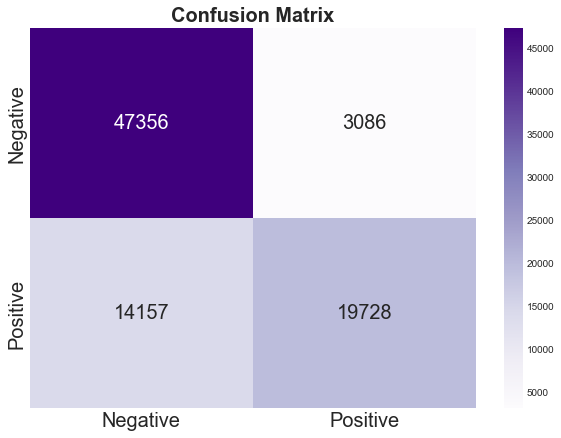

In [219]:
plt.figure(figsize=(10,7))
sns.heatmap(cf_mat, annot=True,
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'],
            cmap='Purples',
            fmt='g',
            annot_kws={'size':20})
plt.title('Confusion Matrix',fontsize=20,fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()

Total : 70273

* ***TN( True Negative ) : 47356***
* ***FP( False Positive ) : 3086***
* ***FN( False Negative ) : 14157***
* ***TP( True Positive) : 33885***

<br>

#### **(2) Prediction & Accuracy Score**

In [224]:
# Accuracy Score
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85     42021
           1       0.87      0.58      0.70     28252

    accuracy                           0.80     70273
   macro avg       0.82      0.76      0.77     70273
weighted avg       0.81      0.80      0.79     70273



* ***Precision : 0.82*** 
* ***Accuracy  : 0.80***

<br><br>

### 2-5. Suggestions for improving the model's performance

*1. Including \'goal\' feature will increase the overall indices for an evaluation, but It causes overfitting problems in my tests.* <br><br>
*2. Extracting year feature from \'deadline\' & \'launced\' and utilizing those might be helpful to improve precision & accuracy, but it also involves a hazard to an overfitting issue.* <br><br>
*3. Removing outliers will be a nice troubleshooter for improving the model\'s performance.* <br><br>
*4. Adjusting a threshold for improving a precision, but the relationship between a precision and an accuracy is trade-off. If a precision goes up, accuracy will go down, and vice versa.* <br><br>

In [230]:
print('1. Including \'goal\' feature will increase the overall indices for an evaluation, but It causes overfitting problems in my tests.\n')
print('2. Extracting year feature from \'deadline\' & \'launced\' and utilizing those might be helpful to improve precision & accuracy, but it also involves a hazard to an overfitting issue.\n')

print('3. Removing outliers will be a nice troubleshooter for improving the model\'s performance.\n')
print('4. Adjusting a threshold for improving a precision, but the relationship between a precision and an accuracy is trade-off. If a precision goes up, accuracy will go down, and vice versa. \n')

1. Including 'goal' feature will increase the overall indices for an evaluation, but It causes overfitting problems in my tests.

2. Extracting year feature from 'deadline' & 'launced' and utilizing those might be helpful to improve precision & accuracy, but it also involves a hazard to an overfitting issue.

3. Removing outliers will be a nice troubleshooter for improving the model's performance.

4. Adjusting a threshold for improving a precision, but the relationship between a precision and an accuracy is trade-off. If a precision goes up, accuracy will go down, and vice versa. 



<br>